Sketch graphically the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad f({\bf x})=(x_1+1)^2+(x_2-2)^2\\
{\text{subject to }} & \quad g_1 = x_1-2\leq 0,{\quad} g_3 = -x_1\leq 0,\\
& \quad g_2 = x_2-1\leq 0, {\quad} g_4 = -x_2\leq 0.
\end{aligned}
$$

Find the optimum graphically. Determine directions of feasible descent at the corner points of the feasible domain. Show the gradient directions of $f$ and $g_i$s at these points. Verify graphical results analytically using the KKT conditions.

![Q1a](h4scans/Q1a.jpg)
![Q1b](h4scans/Q1b.jpg)

### Problem 2 (10 Points)

Graph the problem 

$$
\begin{aligned}
\min_{x_1,x_2} & \quad  f=-x_1\\
{\text{subject to }} & \quad g_1=x_2-(1-x_1)^3\leq 0{\quad} {\rm and}{\quad} x_2\geq 0.
\end{aligned}
$$ 

Find the solution graphically. Then apply the optimality conditions. Can you find a solution based on the optimality conditions? Why? (From Kuhn and Tucker, 1951.)

![Q2a](h4scans/Q2a.jpg)
![Q2b](h4scans/Q2b.jpg)

### Problem 3 (30 Points)

Find a local solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2,x_3} & \quad  f=x_1x_2+x_2x_3+x_1x_3\\
{\text{subject to }} & \quad h=x_1+x_2+x_3-3=0.
\end{aligned}
$$ 

Use two methods: reduced gradient and Lagrange multipliers.

![Q3a](h4scans/Q3a.jpg)
![Q3b](h4scans/Q3b.jpg)

### Problem 4 (20 Points)

Use reduced gradient to	find the value(s) of the parameter $b$ for which the point $x_1=1$, $x_2=2$ is the solution to the problem 

$$
\begin{aligned}
\max_{x_1,x_2} & \quad  f=2x_{1} + bx_2\\
{\text{subject to }} & \quad g_1 = x_{1}^{2}+ x_{2}^{2}-5\leq 0\\
& \quad g_2= x_1- x_2-2\leq 0.
\end{aligned}
$$ 

![Q4](h4scans/Q4.jpg)

### Problem 5 (30 Points)

Find the solution for 

$$
\begin{aligned}
\min_{x_1,x_2,x_3} & \quad  f=x_{1}^{2}+x_{2}^{2}+x_{3}^{2}\\
{\text{subject to }} & \quad h_1 = x_{1}^{2}/4+x_{2}^{2}/5+x_{3}^{2}/25-1=0\\
& \quad h_2 = x_1+x_2-x_3= 0,
\end{aligned}
$$ 

by implementing the generalized reduced gradient algorithm.
![Q5](h4scans/Q5.jpg)

[-1.57571257  1.37414995 -0.20156261]


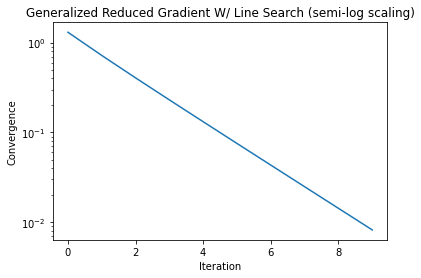

In [13]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from line_search_grg import*
from sk_solve import*


sol=[]
err=[]
itt=0
conv=1

def f(x):
    return x[0]**2+x[1]**2+x[2]**2

def h(x):
    return np.array( [x[0]**2 /4+x[1]**2 /5+x[2]**2 /25-1, x[0] + x[1] - x[2]])

def pfpd(x):
    return 2*x[2]

def pfps(x):    
    return np.array([2*x[0], 2*x[1]])

def phps(x):
    return np.array([[(1/2)*x[0], (2/5)*x[1]],[1, 1]])

def phpd(x):
    return np.array([(2/25)*x[2], -1])

def dfdd_eqn(x):
    return pfpd(x)-np.matmul(np.matmul(pfps(x),np.linalg.inv(phps(x))),phpd(x))

k=0
e=10e-3

#state variables x1 x2
sk = np.array([-2*m.sqrt(15/17),m.sqrt(5/51)])

#decision variables x3
dk = np.array([-5*m.sqrt(5/51)])

#define x argument
x0=np.concatenate([sk,dk])

check=h(np.concatenate([sk,dk]))

dfdd=dfdd_eqn(x0)

while conv >= e:

    ak=line_search_grg(f,dfdd_eqn,sk,dk,phps,phpd)
    #ak=.2
    dk=dk-ak*dfdd_eqn(np.concatenate([sk,dk]))
    
    sk= sk + ak * np.transpose(np.matmul(np.linalg.inv(phps(np.concatenate([sk,dk]))),phpd(np.concatenate([sk,dk])))*np.transpose(dfdd_eqn(np.concatenate([sk,dk]))))

    sk=sk_solve(h,dk,sk,e,phps)

    conv=np.linalg.norm(dfdd_eqn(np.concatenate([sk,dk])))

    sol.append(conv)
    
print(np.concatenate([sk,dk]))

plt.plot(sol)
plt.title("Generalized Reduced Gradient W/ Line Search (semi-log scaling)")
plt.xlabel("Iteration")
plt.ylabel("Convergence")

plt.yscale("log")